# Avaliação de Clusters com KMeans e Dados Preenchidos


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [ ]:
# Carregamento e preparação dos dados
df = pd.read_csv('wine.csv')


df_numerico = df.select_dtypes(include=['int64', 'float64'])


if 'target' in df_numerico.columns:
    X = df_numerico.drop('target', axis=1)
else:
    X = df_numerico.copy()

# previsão dos dados ausentes

imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputado)

In [ ]:
# Avaliação de Clusters para diferentes valores de k

k_values = range(2, 11)
inertia = []
silhouette_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))

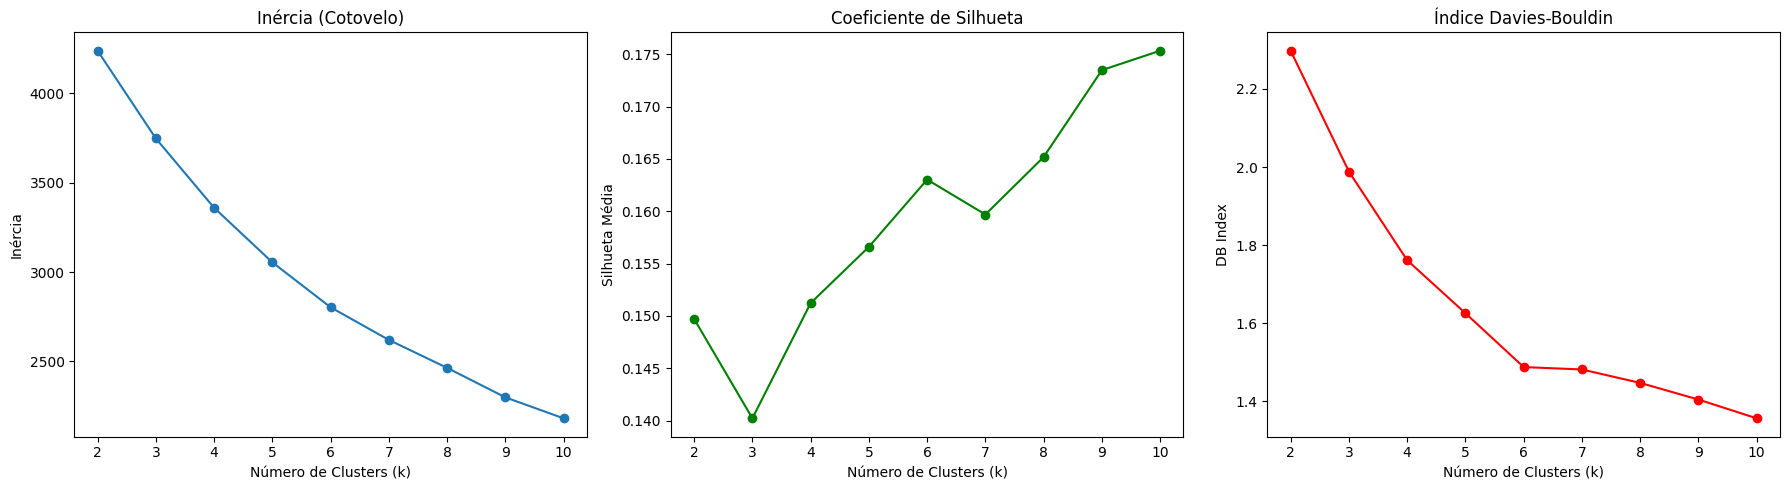

In [ ]:
# Visualização dos resultados

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Inércia (Cotovelo)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')

plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhueta Média')

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o', color='red')
plt.title('Índice Davies-Bouldin')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()